In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Goal - use th word2topic file for image+caption labels along with NER and Quote data to predict likes

## Nike

### Reading data files

In [2]:
# reading different file for Nike 
nike_ner_quote = pd.read_csv('Nike/nike_ner_quote.csv')
nike_word2topic = pd.read_csv('Nike/nike_final_word2topic.csv')
nike_word2topic.rename(columns={nike_word2topic.columns[0]: 'word'}, inplace=True)
nike_img_cap_tfidf = pd.read_csv('Nike/nike_img_cap_tf_idf.csv')

In [3]:
nike_ner_quote.head()

,caption,n_likes_1000,n_comments,event,fac,gpe,law,loc,money,norp,org,person,product,work_of_art,personal_quote,quote
0,“100% of myself is nothing compared to 1% of t...,290k,28175,0,0,0,0,0,0,0,0,1,0,0,1,0
1,"Meet @azusa25nigo, the founder of @skate_girls...",88k,66716,0,0,1,0,0,0,1,3,1,0,1,0,0
2,It takes courage to take the first step 🏃. Jus...,243k,46306,0,0,2,0,0,0,1,3,0,0,1,0,0
3,“The climate crisis is affecting my sport and ...,159k,87011,0,0,0,0,0,0,0,0,1,0,0,0,1
4,“People like to tell us what we can and can’t ...,252k,67646,0,0,0,0,0,0,0,3,0,0,0,1,0


In [4]:
nike_word2topic.head()

,word,nike_brand,sports_photography,nature_people,sports_accessories,outdoors
0,leisure,0.006027,0.004781,0.027133,0.002787,0.025386
1,recreation,0.010542,0.003827,0.011233,0.010195,0.025386
2,happy,0.010542,0.016234,0.027133,0.011120,0.024233
3,water,0.021828,0.003827,0.012168,0.000009,0.023079
4,nike,0.036125,0.012416,0.011118,0.026861,0.022068


In [5]:
nike_img_cap_tfidf.head()

,Unnamed: 0,really,shawnjohnsons,needle,toddantonyphoto,nosajthe,broken,fixture,tired,collect,...,universal,narrow,bowerman,corner,rise,tomckean,fencer,gomofarah,racer,img_cap_list
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['furniture', 'picture', 'frame', 'beard', 'st..."
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['sleeve', 'hat', 'music', 'workwear', 'cool',..."
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['footwear', 'jeans', 'shoe', 'wheel', 'sports..."
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['joint', 'skin', 'shoe', 'arm', 'leg', 'short..."
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['skin', 'lip', 'shoulder', 'white', 'eyelash'..."


In [6]:
print(nike_ner_quote.shape, nike_word2topic.shape, nike_img_cap_tfidf.shape)

(612, 16) (100, 6) (612, 3270)


In [7]:
nike_ner_quote.iloc[0, 0]

'“100% of myself is nothing compared to 1% of the team.”\xa0- @kipchogeeliud \n\xa0\nIf marathon world-record holding, Olympic gold medalist Eliud Kipchoge believes in something, there’s probably something to it.\n\xa0\nAs runners, we’re all on the same team. Working toward the same goal. Not just to become better runners, but better versions of ourselves.\xa0\n\xa0\nCheck\xa0@nikerunning\xa0for advice, insights and answers from elite athletes to first-time marathoners all season long.'

In [8]:
# assertion check to match the dimensions
assert nike_ner_quote.shape[0] == nike_img_cap_tfidf.shape[0]

### Creating the topic for supervised learning

In [9]:
# creating word tf_idf array
nike_word_tfidf_ar = nike_img_cap_tfidf[nike_word2topic['word']].values

# creating word to topic array
nike_word2topic_ar = nike_word2topic.iloc[:, 1:].values

# creating final topic data for supervised learning
nike_topic = pd.DataFrame(np.dot(nike_word_tfidf_ar, nike_word2topic_ar), columns=nike_word2topic.columns[1:])

In [10]:
nike_topic

,nike_brand,sports_photography,nature_people,sports_accessories,outdoors
0,0.007883,0.008295,0.007629,0.006617,0.006733
1,0.005183,0.006898,0.005166,0.005505,0.003232
2,0.006647,0.005944,0.004943,0.004796,0.005670
3,0.009271,0.011597,0.010307,0.013102,0.011201
4,0.009438,0.013581,0.012729,0.013675,0.011770
...,...,...,...,...,...
607,0.011304,0.019869,0.017688,0.016905,0.015233
608,0.007514,0.008276,0.007124,0.011301,0.006998
609,0.017475,0.012666,0.012075,0.016084,0.016761
610,0.010794,0.008720,0.012774,0.008370,0.013028


In [11]:
nike_supervised = pd.concat([nike_ner_quote, nike_topic], axis=1)
nike_supervised

,caption,n_likes_1000,n_comments,event,fac,gpe,law,loc,money,norp,...,person,product,work_of_art,personal_quote,quote,nike_brand,sports_photography,nature_people,sports_accessories,outdoors
0,“100% of myself is nothing compared to 1% of t...,290k,28175,0,0,0,0,0,0,0,...,1,0,0,1,0,0.007883,0.008295,0.007629,0.006617,0.006733
1,"Meet @azusa25nigo, the founder of @skate_girls...",88k,66716,0,0,1,0,0,0,1,...,1,0,1,0,0,0.005183,0.006898,0.005166,0.005505,0.003232
2,It takes courage to take the first step 🏃. Jus...,243k,46306,0,0,2,0,0,0,1,...,0,0,1,0,0,0.006647,0.005944,0.004943,0.004796,0.005670
3,“The climate crisis is affecting my sport and ...,159k,87011,0,0,0,0,0,0,0,...,1,0,0,0,1,0.009271,0.011597,0.010307,0.013102,0.011201
4,“People like to tell us what we can and can’t ...,252k,67646,0,0,0,0,0,0,0,...,0,0,0,1,0,0.009438,0.013581,0.012729,0.013675,0.011770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,Run Dem Crew founder @daddydark rallys the tro...,6k,16,0,0,1,0,0,0,1,...,0,0,0,0,0,0.011304,0.019869,0.017688,0.016905,0.015233
608,20 minutes of balling earned us 449 NikeFuel. ...,10k,81,0,0,0,0,0,2,0,...,0,1,0,0,0,0.007514,0.008276,0.007124,0.011301,0.006998
609,10 explosive minutes from @ShawnJohnsons Nike+...,13k,125,0,0,0,0,0,1,0,...,1,0,0,0,0,0.017475,0.012666,0.012075,0.016084,0.016761
610,We crashed a NTC class with @ShawnJohnson at t...,9k,48,0,0,0,0,0,0,0,...,1,0,0,0,0,0.010794,0.008720,0.012774,0.008370,0.013028


In [12]:
nike_supervised.columns

Index(['caption', 'n_likes_1000', 'n_comments', 'event', 'fac', 'gpe', 'law',
       'loc', 'money', 'norp', 'org', 'person', 'product', 'work_of_art',
       'personal_quote', 'quote', 'nike_brand', 'sports_photography',
       'nature_people', 'sports_accessories', 'outdoors'],
      dtype='object')

### Outcome variable treatment

In [13]:
def likes_conversion(likes):
    if 'k' in likes:
        return int(likes.replace('k', ''))
    elif 'm' in likes:
        return 1000*int(likes.replace('m', ''))
    elif ('k' not in likes) & ('m' not in likes):
        return int(likes.replace('m', ''))/1000
    else:
        return int(likes)

In [14]:
# converting k/m into int
print(nike_supervised['n_likes_1000'].dtype)
nike_supervised['n_likes_1000'] = nike_supervised['n_likes_1000'].map(likes_conversion)
print(nike_supervised['n_likes_1000'].dtype)

object
int64


<AxesSubplot:>

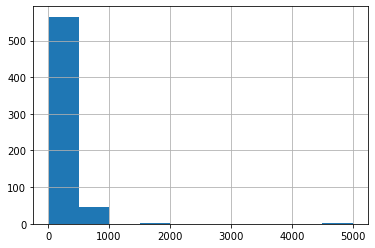

In [15]:
nike_supervised['n_likes_1000'].hist()

(array([ 21.,  43.,  59.,  59., 127., 182., 102.,  17.,   1.,   1.]),
 array([-2.72262574, -2.12924278, -1.53585982, -0.94247686, -0.3490939 ,
         0.24428906,  0.83767202,  1.43105499,  2.02443795,  2.61782091,
         3.21120387]),
 <BarContainer object of 10 artists>)

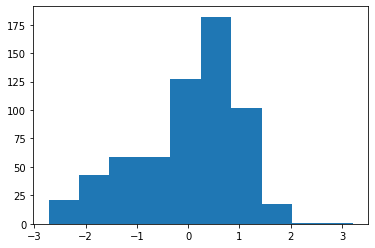

In [16]:
# normalizing the likes variable
# first taking the log and then normalizing
nike_supervised['logn_likes_1000'] = np.log(nike_supervised['n_likes_1000'])

scaler = StandardScaler()
scaler.fit(nike_supervised[['logn_likes_1000']])
y = scaler.transform(nike_supervised[['logn_likes_1000']])
plt.hist(y)

### Topic probabilities distribution

In [17]:
X = nike_supervised.iloc[:, 3: -1]

nike_brand


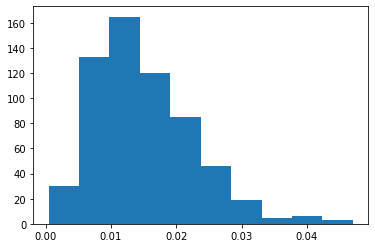

sports_photography


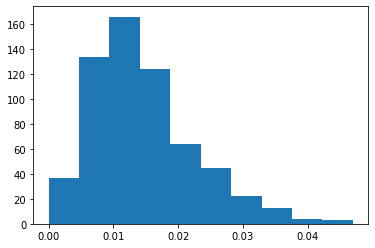

nature_people


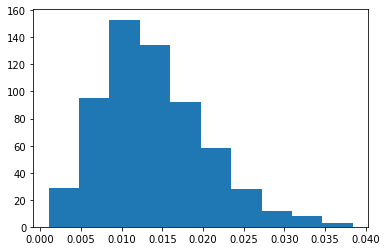

sports_accessories


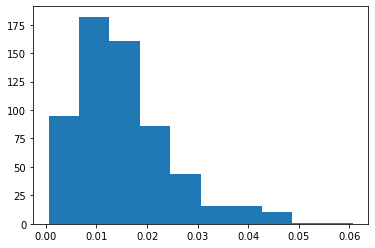

In [18]:
for topic in X.columns[-5:-1]:
    print(topic)
    plt.hist(nike_supervised[topic])
    plt.show()

Distributions are closer to normal so no need for any treatment

### Supervised learning

In [19]:
import statsmodels.api as sm
X = sm.add_constant(X)
lr = sm.OLS(y,X).fit()
summary = lr.summary()  
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     9.491
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.90e-23
Time:                        12:01:14   Log-Likelihood:                -790.92
No. Observations:                 612   AIC:                             1620.
Df Residuals:                     593   BIC:                             1704.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3212      0.106      3.021      0.003       0.112       0.530
event                  0.2357      0.292      0.806      0.420      -0.338       0.810
fac                    0.2316      0.232      0.998      0.319      -0.224       0.688
gpe                   -0.2386      0.059     -4.029      0.000      -0.355      -0.122
law                    0.2334      0.903      0.259      0.796      -1.539       2.006
loc                    0.2653      0.170      1.560      0.119      -0.069       0.599
money                 -0.6854      0.089     -7.708      0.000      -0.860      -0.511
norp                   0.2924      0.138      2.120      0.034       0.022       0.563
org                   -0.1522      0.040     -3.825      0.000      -0.230      -0.074
person                -0.0645      0.055     -1.169      0.243      -0.173       0.044
product               -0.4155      0.214     -1.942      0.053      -0.836       0.005
work_of_art            0.1911      0.266      0.718      0.473      -0.331       0.713
personal_quote         0.5541      0.168      3.303      0.001       0.225       0.884
quote                  0.5001      0.191      2.625      0.009       0.126       0.874
nike_brand           -31.5032      8.919     -3.532      0.000     -49.021     -13.986
sports_photography    23.7223      9.833      2.413      0.016       4.411      43.034
nature_people          9.1715     11.623      0.789      0.430     -13.655      31.998
sports_accessories   -16.5051      7.724     -2.137      0.033     -31.675      -1.335
outdoors               9.8695     11.960      0.825      0.410     -13.619      33.358
==============================================================================
Omnibus:                       12.454   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.103
Skew:                          -0.302   Prob(JB):                      0.00143
Kurtosis:                       3.386   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# identifying significant variables
results_as_html = summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

significant_vars = list(summary_df.loc[summary_df['P>|t|'] <= 0.05].index.values)
significant_vars

['const',
 'gpe',
 'money',
 'norp',
 'org',
 'personal_quote',
 'quote',
 'nike_brand',
 'sports_photography',
 'sports_accessories']

In [21]:
import statsmodels.api as sm
X_sign = X[significant_vars]
X_sign = sm.add_constant(X_sign)
lr = sm.OLS(y, X_sign).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     17.53
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.64e-26
Time:                        12:01:14   Log-Likelihood:                -797.16
No. Observations:                 612   AIC:                             1614.
Df Residuals:                     602   BIC:                             1658.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3553      0.102      3.496      0.001       0.156       0.555
gpe                   -0.2357      0.059     -4.011      0.000      -0.351      -0.120
money                 -0.6846      0.088     -7.799      0.000      -0.857      -0.512
norp                   0.2860      0.136      2.101      0.036       0.019       0.553
org                   -0.1598      0.039     -4.138      0.000      -0.236      -0.084
personal_quote         0.5373      0.162      3.308      0.001       0.218       0.856
quote                  0.5126      0.188      2.724      0.007       0.143       0.882
nike_brand           -19.4456      5.355     -3.632      0.000     -29.962      -8.930
sports_photography    31.9066      8.744      3.649      0.000      14.734      49.079
sports_accessories   -21.1113      7.385     -2.859      0.004     -35.615      -6.608
==============================================================================
Omnibus:                       13.650   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.032
Skew:                          -0.341   Prob(JB):                     0.000897
Kurtosis:                       3.293   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Attempt RF

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y.ravel(), test_size = 0.4, random_state = 42)

In [101]:
reg = RandomForestRegressor(n_estimators=600,ccp_alpha=0.1, max_depth = 14 , bootstrap=True,random_state=42)
reg.fit(X_train,y_train)
#ravel(y)
score = reg.score(X_test, y_test)
score

0.024225444133657015

In [102]:
#Shapley
import shap
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


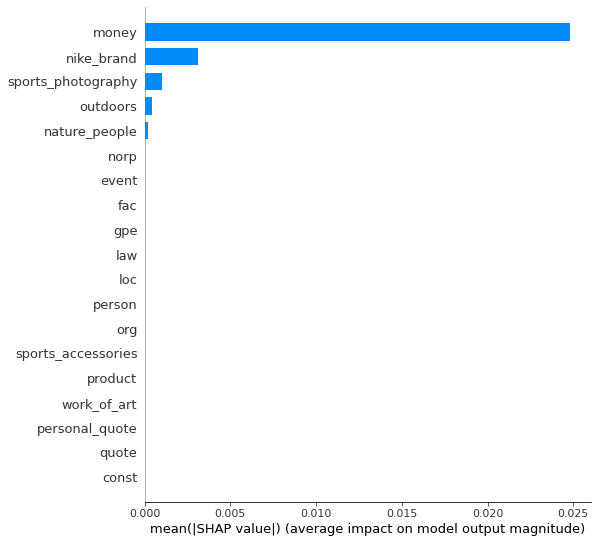

In [103]:
shap.summary_plot(shap_values, X, plot_type="bar")

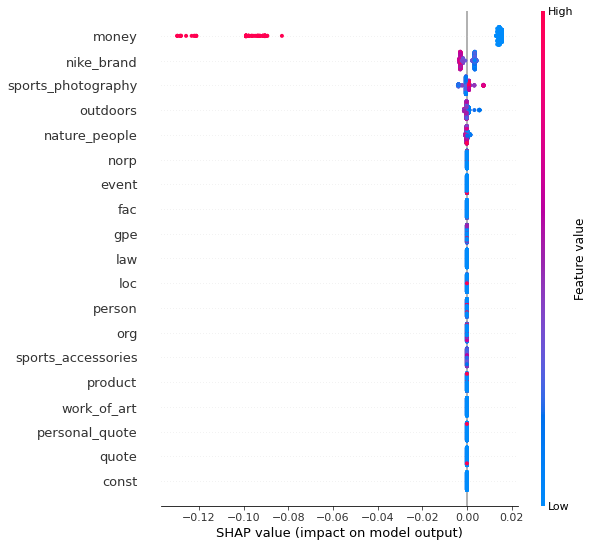

In [104]:
shap.summary_plot(shap_values, X)

In [110]:
shap.initjs()

In [130]:
#Nike brand plots
for i in range(5):
    idx = X.sort_values('nike_brand',ascending=False).index.values[i]
    display(shap.force_plot(explainer.expected_value[0], shap_values[idx,:], X.iloc[idx,:]))

In [132]:
#Money plots
for i in range(5):
    idx = X.sort_values('money',ascending=False).index.values[i]
    display(shap.force_plot(explainer.expected_value[0], shap_values[idx,:], X.iloc[idx,:]))

In [133]:
#Sports photography plots
for i in range(5):
    idx = X.sort_values('sports_photography',ascending=False).index.values[i]
    display(shap.force_plot(explainer.expected_value[0], shap_values[idx,:], X.iloc[idx,:]))

In [136]:
#Outdoors and Nature photography plots not very pertinent
# for i in range(5):
#     idx = X.sort_values('nature_people',ascending=False).index.values[i]
#     display(shap.force_plot(explainer.expected_value[0], shap_values[idx,:], X.iloc[idx,:]))

#### Fitting based on topics only

In [22]:
import statsmodels.api as sm
X_topic = X.iloc[:, -5:]
# X_topic = sm.add_constant(X_topic)
lr = sm.OLS(y, X_topic).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              8.265
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                    1.44e-07
Time:                        11:56:18   Log-Likelihood:                         -848.24
No. Observations:                 612   AIC:                                      1706.
Df Residuals:                     607   BIC:                                      1729.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
nike_brand           -39.4067      9.424     -4.182      0.000     -57.914     -20.899
sports_photography    34.1348     10.302      3.313      0.001      13.903      54.366
nature_people         22.9533     12.156      1.888      0.059      -0.919      46.826
sports_accessories   -20.1542      8.316     -2.423      0.016     -36.487      -3.822
outdoors               5.1008     12.788      0.399      0.690     -20.014      30.215
==============================================================================
Omnibus:                       37.284   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.790
Skew:                          -0.645   Prob(JB):                     5.11e-10
Kurtosis:                       3.117   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# removing outdoors
import statsmodels.api as sm
X_topic = X.iloc[:, -5:-1]
# X_topic = sm.add_constant(X_topic)
lr = sm.OLS(y, X_topic).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              10.31
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                    4.43e-08
Time:                        11:56:19   Log-Likelihood:                         -848.32
No. Observations:                 612   AIC:                                      1705.
Df Residuals:                     608   BIC:                                      1722.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
nike_brand           -37.8296      8.548     -4.425      0.000     -54.618     -21.041
sports_photography    35.5929      9.625      3.698      0.000      16.691      54.495
nature_people         25.6997     10.011      2.567      0.010       6.040      45.359
sports_accessories   -20.7787      8.162     -2.546      0.011     -36.808      -4.749
==============================================================================
Omnibus:                       37.477   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.045
Skew:                          -0.647   Prob(JB):                     4.50e-10
Kurtosis:                       3.119   Cond. No.                         11.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing features based on VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns[1:]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(1, len(X.columns))]
vif_data

,feature,VIF
0,event,1.048465
1,fac,1.047916
2,gpe,1.103661
3,law,1.015139
4,loc,1.043495
5,money,1.045298
6,norp,1.098179
7,org,1.139855
8,person,1.216021
9,product,1.051737


In [25]:
vif_features = list(vif_data.loc[vif_data['VIF'] <= 5, 'feature'].values)

# removing outdoors
import statsmodels.api as sm
X_vif = X[vif_features]
X_vif = sm.add_constant(X_vif)
lr = sm.OLS(y, X_vif).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     10.01
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.22e-23
Time:                        11:56:24   Log-Likelihood:                -791.27
No. Observations:                 612   AIC:                             1619.
Df Residuals:                     594   BIC:                             1698.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3286      0.106      3.102      0.002       0.121       0.537
event                  0.2398      0.292      0.821      0.412      -0.334       0.814
fac                    0.2287      0.232      0.986      0.325      -0.227       0.684
gpe                   -0.2411      0.059     -4.077      0.000      -0.357      -0.125
law                    0.2019      0.902      0.224      0.823      -1.569       1.972
loc                    0.2617      0.170      1.540      0.124      -0.072       0.596
money                 -0.6805      0.089     -7.672      0.000      -0.855      -0.506
norp                   0.2891      0.138      2.097      0.036       0.018       0.560
org                   -0.1539      0.040     -3.875      0.000      -0.232      -0.076
person                -0.0642      0.055     -1.164      0.245      -0.173       0.044
product               -0.4214      0.214     -1.971      0.049      -0.841      -0.002
work_of_art            0.1863      0.266      0.701      0.484      -0.336       0.708
personal_quote         0.5458      0.167      3.260      0.001       0.217       0.875
quote                  0.4915      0.190      2.584      0.010       0.118       0.865
nike_brand           -28.7018      8.246     -3.481      0.001     -44.897     -12.507
sports_photography    26.5031      9.235      2.870      0.004       8.366      44.641
nature_people         14.5224      9.644      1.506      0.133      -4.417      33.462
sports_accessories   -17.7381      7.576     -2.341      0.020     -32.618      -2.858
==============================================================================
Omnibus:                       13.538   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.356
Skew:                          -0.316   Prob(JB):                     0.000763
Kurtosis:                       3.404   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adidas

### Reading data files

In [26]:
# reading different file for adidas 
adidas_ner_quote = pd.read_csv('Adidas/adidas_ner_quote.csv')
adidas_word2topic = pd.read_csv('Adidas/adidas_final_word2topic.csv')
adidas_word2topic.rename(columns={adidas_word2topic.columns[0]: 'word'}, inplace=True)
adidas_img_cap_tfidf = pd.read_csv('Adidas/adidas_img_cap_tf_idf.csv')

In [27]:
adidas_ner_quote.head()

,caption,n_likes_1000,n_comments,event,fac,gpe,law,loc,money,norp,org,person,product,work_of_art,personal_quote,quote
0,As South Africa’s first Black rugby captain @s...,22k,356,0,0,1,0,0,0,0,0,1,0,0,0,0
1,Mother. Daughter. Hooper. Leader.​\n\nTo some ...,20k,530,0,0,0,0,0,0,0,2,0,0,0,0,0
2,"Records are made to be broken.\n\nToday, Agnes...",37k,179,0,0,2,0,0,1,0,2,4,0,0,0,0
3,Sport is for everyone.,144k,746,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"&quot;She never saw what she could not, only w...",26k,17471,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
adidas_word2topic.head()

,word,artistic,nature_people,fitness,shoewear,sports_accessories
0,uniform,0.028967,0.009628,0.003556,0.005639,0.033628
1,footwear,0.005274,0.020446,0.013007,0.044107,0.030026
2,player,0.021947,0.001214,0.009463,0.015021,0.028825
3,game,0.006151,0.002416,0.009463,0.003762,0.026424
4,thigh,0.026335,0.016840,0.014750,0.024896,0.024023


In [29]:
adidas_img_cap_tfidf.head()

,Unnamed: 0,fearless,strongerforit,coding,jaque1212,concrete,leomessi,coreyrichproduction,feel,baller,...,writer,historical,distance,without,ritaora,bookcase,eiger,argentinas,collide,img_cap_list
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['sky', 'neck', 'sleeve', 'grass', 't', '-', '..."
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['forehead', 'chin', 'eyebrow', 'facial', 'exp..."
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['short', 'thigh', 'sportswear', 'performing',..."
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['sport', 'uniform', 'short', 'shoe', 'active'..."
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['smile', 'leg', 'shorts', 'thigh', 'waist', '..."


In [30]:
print(adidas_ner_quote.shape, adidas_word2topic.shape, adidas_img_cap_tfidf.shape)

(610, 16) (95, 6) (612, 2926)


In [31]:
adidas_ner_quote.iloc[0, 0]

'As South Africa’s first Black rugby captain @siya_kolisi_the_bear, saw the possibilities of uniting all people through sport so that we can see the possibilities of a better future, together.\n\nWhat possibilities do you see?\n\n#ImpossibleIsNothing\n\nStory narrated by Dee Koala (@dee_koala).'

In [32]:
# assertion check to match the dimensions
assert nike_ner_quote.shape[0] == nike_img_cap_tfidf.shape[0]

### Creating the topic for supervised learning

In [33]:
# creating word tf_idf array
adidas_word_tfidf_ar = adidas_img_cap_tfidf[adidas_word2topic['word']].values

# creating word to topic array
adidas_word2topic_ar = adidas_word2topic.iloc[:, 1:].values

# creating final topic data for supervised learning
adidas_topic = pd.DataFrame(np.dot(adidas_word_tfidf_ar, adidas_word2topic_ar), columns=adidas_word2topic.columns[1:])

In [34]:
adidas_topic

,artistic,nature_people,fitness,shoewear,sports_accessories
0,0.031004,0.022119,0.013874,0.016322,0.023359
1,0.012456,0.008219,0.008036,0.008860,0.004082
2,0.012484,0.011672,0.009547,0.012335,0.011024
3,0.021934,0.019668,0.018863,0.014972,0.028840
4,0.019243,0.016684,0.011796,0.019308,0.012560
...,...,...,...,...,...
607,0.015728,0.005405,0.016746,0.009644,0.011423
608,0.008200,0.009369,0.017818,0.011743,0.011820
609,0.007356,0.005532,0.010625,0.008467,0.004415
610,0.015009,0.007684,0.016773,0.010924,0.011060


In [35]:
adidas_supervised = pd.concat([adidas_ner_quote, adidas_topic], axis=1)
adidas_supervised.dropna(inplace=True)
adidas_supervised

,caption,n_likes_1000,n_comments,event,fac,gpe,law,loc,money,norp,...,person,product,work_of_art,personal_quote,quote,artistic,nature_people,fitness,shoewear,sports_accessories
0,As South Africa’s first Black rugby captain @s...,22k,356.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.031004,0.022119,0.013874,0.016322,0.023359
1,Mother. Daughter. Hooper. Leader.​\n\nTo some ...,20k,530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012456,0.008219,0.008036,0.008860,0.004082
2,"Records are made to be broken.\n\nToday, Agnes...",37k,179.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.012484,0.011672,0.009547,0.012335,0.011024
3,Sport is for everyone.,144k,746.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.021934,0.019668,0.018863,0.014972,0.028840
4,"&quot;She never saw what she could not, only w...",26k,17471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.019243,0.016684,0.011796,0.019308,0.012560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,"Donated by proud LBP alum @SnoopDogg, check ou...",50k,206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.010329,0.009141,0.022786,0.010509,0.010084
606,#Primeknit Pure #BOOST: extreme energy meets a...,60k,598.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.020041,0.041582,0.019951,0.026022,0.024841
607,"Predator is the past, present and future. Inst...",64k,221.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.015728,0.005405,0.016746,0.009644,0.011423
608,Simply #unstoppable: the @adidasOriginals by @...,54k,460.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.008200,0.009369,0.017818,0.011743,0.011820


In [36]:
adidas_supervised.columns

Index(['caption', 'n_likes_1000', 'n_comments', 'event', 'fac', 'gpe', 'law',
       'loc', 'money', 'norp', 'org', 'person', 'product', 'work_of_art',
       'personal_quote', 'quote', 'artistic', 'nature_people', 'fitness',
       'shoewear', 'sports_accessories'],
      dtype='object')

### Outcome variable treatment

In [37]:
# converting k/m into int
print(adidas_supervised['n_likes_1000'].dtype)
adidas_supervised['n_likes_1000'] = adidas_supervised['n_likes_1000'].map(likes_conversion)
print(adidas_supervised['n_likes_1000'].dtype)

object
int64


<AxesSubplot:>

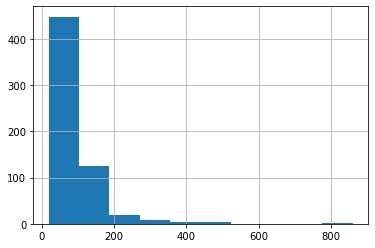

In [38]:
adidas_supervised['n_likes_1000'].hist()

(array([ 19.,  47.,  93., 216., 138.,  60.,  21.,   9.,   6.,   1.]),
 array([-2.60012857, -1.90964674, -1.21916491, -0.52868308,  0.16179875,
         0.85228058,  1.54276241,  2.23324424,  2.92372607,  3.6142079 ,
         4.30468973]),
 <BarContainer object of 10 artists>)

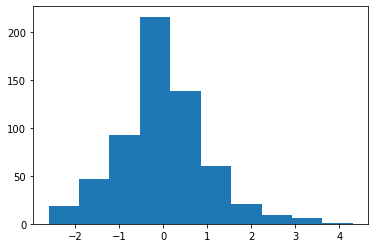

In [39]:
# normalizing the likes variable
# first taking the log and then normalizing
adidas_supervised['logn_likes_1000'] = np.log(adidas_supervised['n_likes_1000'])

scaler = StandardScaler()
scaler.fit(adidas_supervised[['logn_likes_1000']])
y = scaler.transform(adidas_supervised[['logn_likes_1000']])
plt.hist(y)

### Topic probabilities distribution

In [40]:
X = adidas_supervised.iloc[:, 3: -1]

artistic


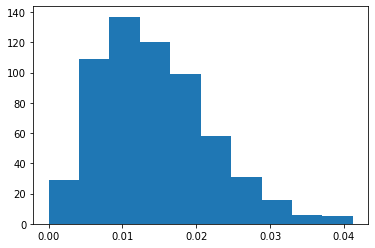

nature_people


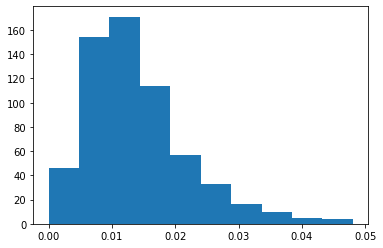

fitness


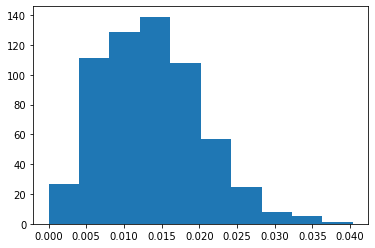

shoewear


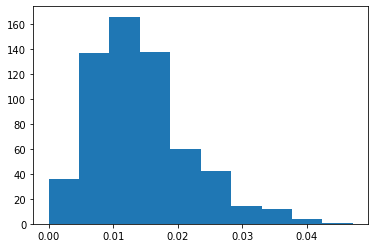

In [41]:
for topic in X.columns[-5:-1]:
    print(topic)
    plt.hist(adidas_supervised[topic])
    plt.show()

Distributions are closer to normal so no need for any treatment

### Supervised learning

In [42]:
import statsmodels.api as sm
X = sm.add_constant(X)
lr = sm.OLS(y,X).fit()  
summary = lr.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.200
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.92e-06
Time:                        11:56:34   Log-Likelihood:                -837.18
No. Observations:                 610   AIC:                             1712.
Df Residuals:                     591   BIC:                             1796.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2614      0.109     -2.390      0.017      -0.476      -0.047
event                 -0.0862      0.405     -0.213      0.832      -0.882       0.710
fac                    0.0685      0.411      0.166      0.868      -0.740       0.877
gpe                    0.0349      0.086      0.406      0.685      -0.134       0.203
law                    2.0698      0.565      3.664      0.000       0.960       3.179
loc                    0.1454      0.186      0.783      0.434      -0.219       0.510
money                  0.1826      0.107      1.704      0.089      -0.028       0.393
norp                  -0.2822      0.183     -1.541      0.124      -0.642       0.077
org                    0.0056      0.044      0.128      0.898      -0.080       0.091
person                -0.2146      0.063     -3.400      0.001      -0.339      -0.091
product               -0.1061      0.255     -0.416      0.677      -0.607       0.395
work_of_art            0.3007      0.376      0.800      0.424      -0.438       1.039
personal_quote         0.3198      0.692      0.462      0.644      -1.040       1.679
quote                 -0.2170      0.277     -0.783      0.434      -0.761       0.327
artistic               5.4403      8.993      0.605      0.545     -12.223      23.103
nature_people        -10.9454      6.810     -1.607      0.109     -24.320       2.429
fitness               18.9269     10.086      1.877      0.061      -0.882      38.736
shoewear              16.3108      9.591      1.701      0.090      -2.526      35.147
sports_accessories    -8.6825      9.514     -0.913      0.362     -27.369      10.004
==============================================================================
Omnibus:                       28.360   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.325
Skew:                           0.388   Prob(JB):                     1.06e-09
Kurtosis:                       4.012   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# identifying significant variables
results_as_html = summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

significant_vars = list(summary_df.loc[summary_df['P>|t|'] <= 0.05].index.values)
significant_vars

['const', 'law', 'person']

In [44]:
import statsmodels.api as sm
X_sign = X[significant_vars]
X_sign = sm.add_constant(X_sign)
lr = sm.OLS(y, X_sign).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.76
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.52e-07
Time:                        11:56:35   Log-Likelihood:                -851.07
No. Observations:                 610   AIC:                             1708.
Df Residuals:                     607   BIC:                             1721.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0678      0.045      1.508      0.132      -0.020       0.156
law            2.1503      0.567      3.792      0.000       1.037       3.264
person        -0.2298      0.061     -3.747      0.000      -0.350      -0.109
==============================================================================
Omnibus:                       26.090   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.514
Skew:                           0.300   Prob(JB):                     1.31e-10
Kurtosis:                       4.196   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitting based on topics only

In [45]:
import statsmodels.api as sm
X_topic = X.iloc[:, -5:]
# X_topic = sm.add_constant(X_topic)
lr = sm.OLS(y, X_topic).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              1.987
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                      0.0788
Time:                        11:56:35   Log-Likelihood:                         -860.59
No. Observations:                 610   AIC:                                      1731.
Df Residuals:                     605   BIC:                                      1753.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
artistic               3.6742      8.954      0.410      0.682     -13.910      21.258
nature_people        -13.6126      6.795     -2.003      0.046     -26.957      -0.268
fitness               12.7349      9.891      1.287      0.198      -6.691      32.161
shoewear              14.4237      9.757      1.478      0.140      -4.738      33.586
sports_accessories   -14.0162      9.589     -1.462      0.144     -32.849       4.816
==============================================================================
Omnibus:                       30.797   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.655
Skew:                           0.402   Prob(JB):                     7.39e-11
Kurtosis:                       4.091   Cond. No.                         11.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# removing outdoors
import statsmodels.api as sm
X_topic = X.iloc[:, -5:-1]
# X_topic = sm.add_constant(X_topic)
lr = sm.OLS(y, X_topic).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              1.946
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                       0.101
Time:                        11:56:35   Log-Likelihood:                         -861.66
No. Observations:                 610   AIC:                                      1731.
Df Residuals:                     606   BIC:                                      1749.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
artistic         -3.1404      7.651     -0.410      0.682     -18.166      11.886
nature_people   -13.5876      6.801     -1.998      0.046     -26.945      -0.230
fitness          13.3380      9.892      1.348      0.178      -6.089      32.765
shoewear          7.4590      8.522      0.875      0.382      -9.278      24.196
==============================================================================
Omnibus:                       31.365   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.299
Skew:                           0.410   Prob(JB):                     5.36e-11
Kurtosis:                       4.091   Cond. No.                         9.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing features based on VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns[1:]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(1, len(X.columns))]
vif_data

,feature,VIF
0,event,1.037447
1,fac,1.069415
2,gpe,1.067020
3,law,1.012661
4,loc,1.049303
5,money,1.032683
6,norp,1.036141
7,org,1.046409
8,person,1.080557
9,product,1.076380


In [48]:
vif_features = list(vif_data.loc[vif_data['VIF'] <= 5, 'feature'].values)

# removing outdoors
import statsmodels.api as sm
X_vif = X[vif_features]
X_vif = sm.add_constant(X_vif)
lr = sm.OLS(y, X_vif).fit()
lr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.200
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.92e-06
Time:                        11:56:36   Log-Likelihood:                -837.18
No. Observations:                 610   AIC:                             1712.
Df Residuals:                     591   BIC:                             1796.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2614      0.109     -2.390      0.017      -0.476      -0.047
event                 -0.0862      0.405     -0.213      0.832      -0.882       0.710
fac                    0.0685      0.411      0.166      0.868      -0.740       0.877
gpe                    0.0349      0.086      0.406      0.685      -0.134       0.203
law                    2.0698      0.565      3.664      0.000       0.960       3.179
loc                    0.1454      0.186      0.783      0.434      -0.219       0.510
money                  0.1826      0.107      1.704      0.089      -0.028       0.393
norp                  -0.2822      0.183     -1.541      0.124      -0.642       0.077
org                    0.0056      0.044      0.128      0.898      -0.080       0.091
person                -0.2146      0.063     -3.400      0.001      -0.339      -0.091
product               -0.1061      0.255     -0.416      0.677      -0.607       0.395
work_of_art            0.3007      0.376      0.800      0.424      -0.438       1.039
personal_quote         0.3198      0.692      0.462      0.644      -1.040       1.679
quote                 -0.2170      0.277     -0.783      0.434      -0.761       0.327
artistic               5.4403      8.993      0.605      0.545     -12.223      23.103
nature_people        -10.9454      6.810     -1.607      0.109     -24.320       2.429
fitness               18.9269     10.086      1.877      0.061      -0.882      38.736
shoewear              16.3108      9.591      1.701      0.090      -2.526      35.147
sports_accessories    -8.6825      9.514     -0.913      0.362     -27.369      10.004
==============================================================================
Omnibus:                       28.360   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.325
Skew:                           0.388   Prob(JB):                     1.06e-09
Kurtosis:                       4.012   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""